<a href="https://colab.research.google.com/github/Jugranada/Aprendizaje_Maquina/blob/main/talleres/2_DL_Keras_API_funcional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creación de arquitecturas de aprendizaje profundo mediante API funcional de Keras.

- Se presentan los consideraciones básicas respecto a la [API funcional de Keras](https://keras.io/guides/functional_api/) para la implementación de modelos de redes profundas con TensorFlow.



In [2]:
import tensorflow as tf #importar tensorflow
print(tf.__version__)

2.19.0


- Se utilizará la base de datos Fashion Mnist nuevamente, normalizando las imágenes de 0 a 1.

In [3]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


- Se presenta un ejemplo de la base de datos

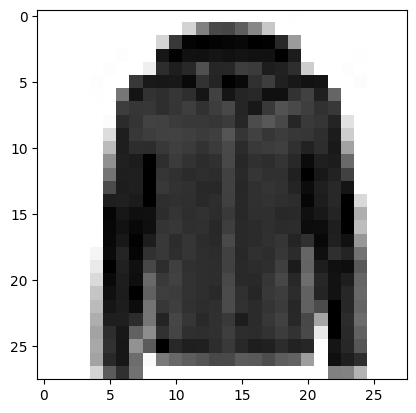

In [4]:
import matplotlib.pyplot as plt
plt.imshow(images[5000,:,:],cmap= 'binary')
plt.show()

In [5]:
import numpy as np
print(np.unique(labels)) #etiquetas
print(images.shape) #tamaño de las imágenes

[0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28)


In [6]:
Xtrain, ytrain = train
Xtrain = Xtrain/255 # tipo flotante, normalizados de 0 a 1
Xtest, ytest = test
Xtest = Xtest/255 # tipo flotante, normalizados de 0 a 1

- En el cuaderno introductorio a redes neuronales con tensorflow se planteó la construcción de modelos mediante secuencia de capas:

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ red1 (Dense)                    │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hred2 (Dense)                   │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,560 (654.53 KB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 0 (0.00 B)

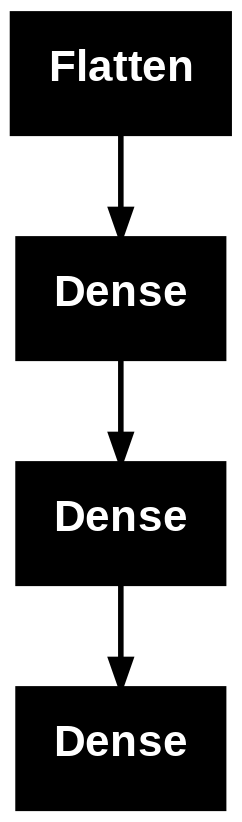

In [7]:
#definir arquitectura secuencial
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2])),
    tf.keras.layers.Dense(200,activation="relu", name='red1'),
    tf.keras.layers.Dense(50, activation="tanh",name='hred2'),
    tf.keras.layers.Dense(10,activation='softmax',name='output')
])

model.summary() # resumen del modelo
tf.keras.utils.plot_model(model) #diagrama del modelo

- Aunque la implementacióm mediante secuencia es intuitiva, no permite realizar conexiones flexibles entre capas.

- En ese sentido, Keras permite crear capas bajo el principio de funciones y argumentos, como se muestra a continuación.

**Nota**: a diferencia de la estructura secuencial, en la API funcional se debe indicar la capa o capas de entrada y la capa o capas de salida para crear el grafo computacional de forma apropiada.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ entrada (InputLayer)            │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h1 (Dense)                      │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h2 (Dense)                      │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,560 (654.53 KB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 0 (0.00 B)

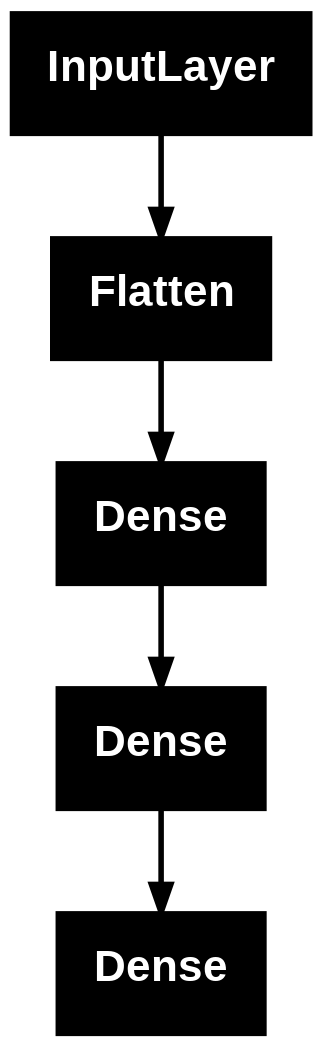

In [8]:
#arquitectura funcional
#capa de entrada
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
#capa de aplanamiento de las imágenes
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)#argumento de entrada
#capas densas
h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)#argumento de entrada
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa de salida
output = tf.keras.layers.Dense(10,activation="softmax",name='output')(h2)
#crear modelo según conexiones tipo funcionales
model_fun = tf.keras.Model(inputs=input_l,outputs=output)

#resumen y gráfica del modelo
model_fun.summary()
tf.keras.utils.plot_model(model_fun)


# La API funcional permite realizar conexiones más flexibles

- En el siguiente ejemplo se crea un modelo con una entrada y dos salidas con interconexiones flexibles:

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


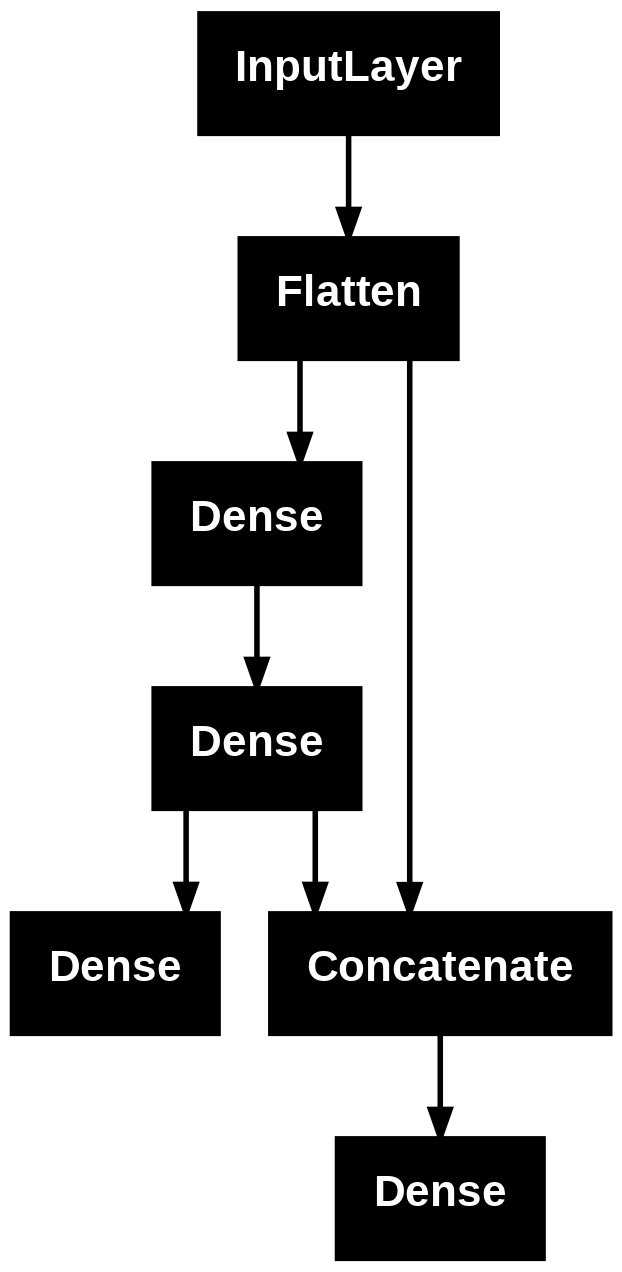

In [9]:
#arquitectura funcional 2
tf.keras.backend.clear_session()
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)

h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2,flatten])
#se crean dos salidas:
output_A = tf.keras.layers.Dense(10,activation="softmax",name='outputA')(concat)#desde concatenación
output_B = tf.keras.layers.Dense(10,activation="softmax",name='outputB')(h2)#desde h2
#las entradas y salidas se ingresan como listas
model_fun = tf.keras.Model(inputs=input_l,outputs=[output_A, output_B])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun)

**Nota**: si se cuenta con varias salidas se puede definir un mismo costo para cada salida, o una lista con los costos requeridos. Además, en la lista `loss_weights` se puede especificar el valor del peso asociado al costo de cada salida en el intervalo [0,1].

In [10]:
model_fun.compile(loss="sparse_categorical_crossentropy", #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy","accuracy"]) #f1, precision, recall, crossentropy


- El entrenamiento se realiza de igual forma al utilizado con el modelo secuencial.

- Como se fijaron dos salidas, se debe ingresar una lista para los argumentos ytrain.

In [11]:
history = model_fun.fit(Xtrain, [ytrain,ytrain] , epochs=10,batch_size=64, # 32, 64, 128, 256
                    validation_split=0.3) # se fija el conjunto de validación como el 20% del de train

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 1.5051 - outputA_accuracy: 0.7302 - outputA_loss: 0.8119 - outputB_accuracy: 0.7563 - outputB_loss: 0.6932 - val_loss: 0.8484 - val_outputA_accuracy: 0.8437 - val_outputA_loss: 0.4276 - val_outputB_accuracy: 0.8450 - val_outputB_loss: 0.4196
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.7990 - outputA_accuracy: 0.8518 - outputA_loss: 0.4057 - outputB_accuracy: 0.8562 - outputB_loss: 0.3933 - val_loss: 0.7452 - val_outputA_accuracy: 0.8669 - val_outputA_loss: 0.3762 - val_outputB_accuracy: 0.8665 - val_outputB_loss: 0.3680
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.7051 - outputA_accuracy: 0.8691 - outputA_loss: 0.3571 - outputB_accuracy: 0.8693 - outputB_loss: 0.3480 - val_loss: 0.7241 - val_outputA_accuracy: 0.8684 - val_outputA_loss: 0.3624 - val_outputB_accuracy: 0.8677 - val_outputB_loss: 0.3608
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6536 - outputA_accuracy: 0.8792 

- Se presentan las curvas de desempeño:

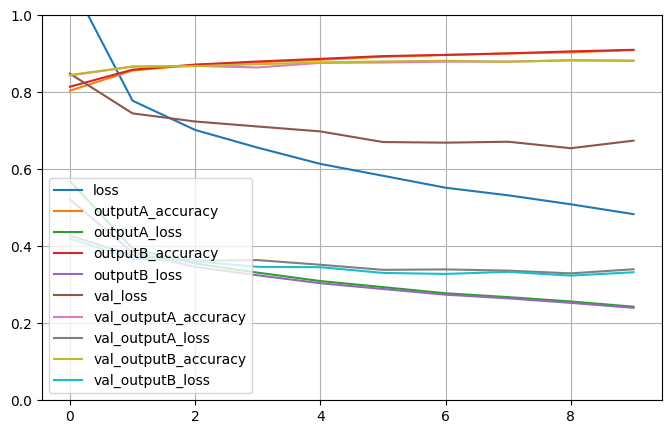

In [12]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

- Como el modelo generado presenta dos salidas, el rendimiento se discrimina por cada salida y el acumulado.

- A la hora de predecir la salida para una nueva muestra, se debe tener en cuenta la cantidad de salidas fijadas.

In [13]:
yestA,yestB = model_fun.predict(Xtest)
print(yestA.shape,yestB.shape)#salidas tipo 1 -K probabilidad de membresia a cada clase

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10) (10000, 10)


In [14]:
print(yestA[0].argmax(),ytest[0])#para estimar la etiqueta ordinal se encuentra el max por columnas

9 9


In [15]:
scoreA = model_fun.evaluate(Xtest,[ytest,ytest])#evaluacion
print(scoreA)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7127 - outputA_accuracy: 0.8726 - outputA_loss: 0.3601 - outputB_accuracy: 0.8730 - outputB_loss: 0.3526
[0.7343651652336121, 0.3713814914226532, 0.36205846071243286, 0.8687000274658203, 0.8711000084877014]


# Grafiquemos los pesos respecto a las dimensiones de la imagen original

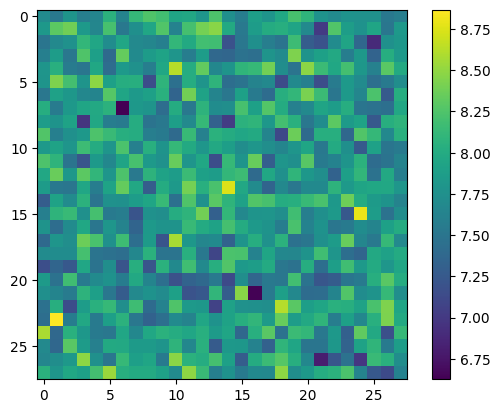

In [16]:
#se busca identificar las entradas más relevantes para la red
plt.imshow(abs(model.layers[1].get_weights()[0]).sum(axis=1).reshape(28,28))
plt.colorbar()
plt.show()

In [17]:
model.layers[1].get_weights()[1].shape # accediendo a los bias

(200,)

# Salidas parciales de la red

- La estrategia funcional nos permite acceder a partes intermedias de la red para encontrar mapas de características y verificar el aprendizaje de la representación.

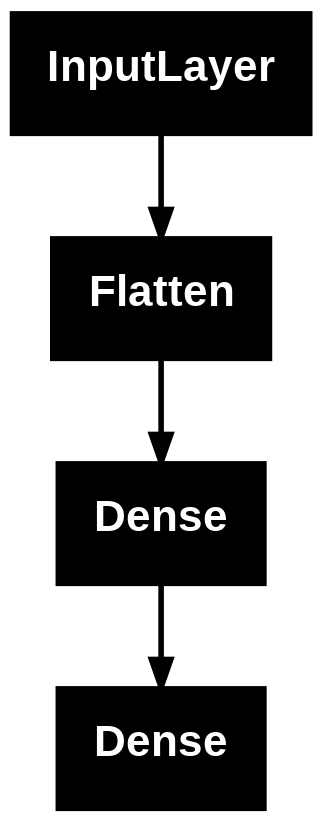

In [18]:
#crear nuevo modelo con salida parcial
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('h2').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_B) # modelo ya esta ajustado!


In [19]:
z = model_B.predict(Xtest) # salida en h2
z.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 50)

### Dado que se fijaron 50 unidades, se pueden utilizar técnicas de reducción de dimensión para visualizar los patrones intermedios de la red en 2D.


# Principal Component Analysis (PCA)

Reducción de dimensión lineal basado en la preservación de la varianza

![PCA1](https://www.soloentendidos.com/wp-content/uploads/2021/06/Principal-Component-Analysis-second-principal_thumb-1.gif)


![PCA2](https://1.bp.blogspot.com/-pgMAHiIWvuw/Tql5HIXNdRI/AAAAAAAABLI/I2zPF5cLRwQ/s1600/clust.gif)


# t-student distributed Stochastic Neighbor Embedding (t-SNE)

Reducción de dimensión basado en la preservación de localidades (vecinos) utilizando medidas de información desde estimación no paramétrica de probabilidad en el espación de alta y baja dimensión, respectivamente.

![tsne](https://learnopencv.com/wp-content/uploads/2022/11/tsne.gif)

![tsne2](https://3.bp.blogspot.com/-NE01azL_JxU/Wxli17oYNzI/AAAAAAAACxQ/axOI2yy-Ft0QbqaekOyemm5Xn0wAFvRUwCLcBGAs/s640/image2.gif)

In [20]:
from sklearn.decomposition import PCA
zpca = PCA(n_components=2).fit_transform(z)
zpca.shape

(10000, 2)

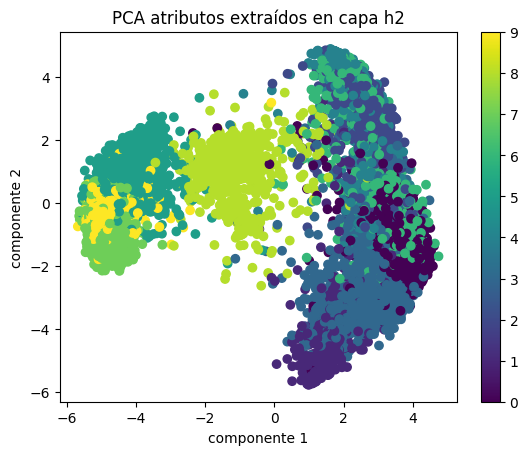

In [21]:
plt.scatter(zpca[:,0],zpca[:,1],c=ytest)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')
plt.show()

In [22]:
#plot mnist 2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def plot_mnist_2d(Z,y,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(16,10))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

- También, podemos revisar la distribución de las imágenes en el espacio proyectado:

Text(0.5, 1.0, 'PCA atributos extraídos en capa h2')

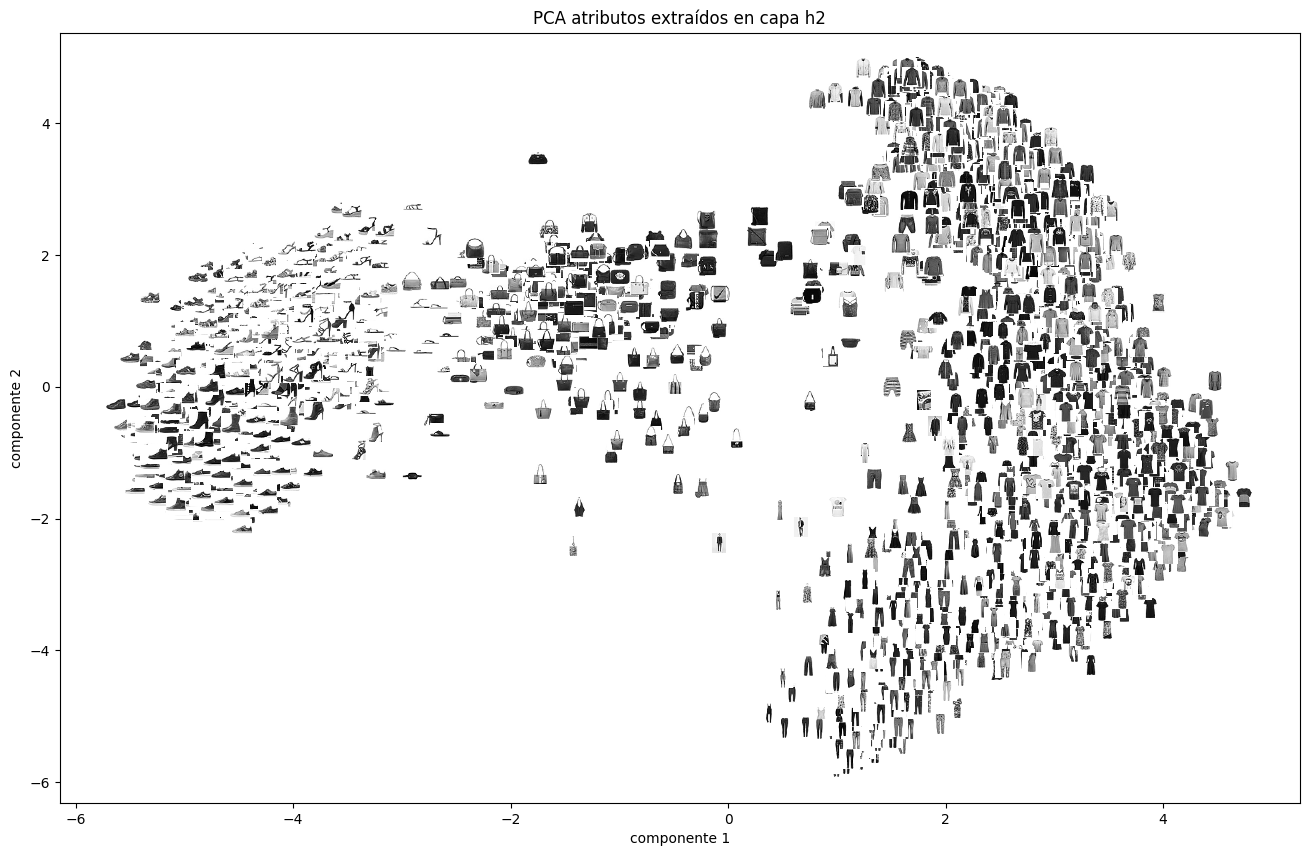

In [23]:
Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')

# Ejercicio:

- Grafique el espacio proyectado de PCA en 2D (etiquetas e imágenes) para los atributos aprendidos por la capa de concatenación.

- Repita el proceso aplicando la técnica de reducción de dimensión [UMAP de RAPIDS](https://developer.nvidia.com/blog/even-faster-and-more-scalable-umap-on-the-gpu-with-rapids-cuml/).

- Plantee una nueva arquitectura tipo funcional utilizando capas convolucionales (Ver cuaderno [CNNs](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/3_Introduccion_CNN.ipynb)) para el entrenamiento de la base de datos Mnist-digitos, utilizando tres entradas: i) imágenes limpias, ii) y iii) imágenes con ruido blanco Gaussiano ante diferentes varianzas, y dos salidas i) estimación del digito, ii) estimación número par número impar.

cuml importado correctamente
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Dimensión de atributos extraídos: (10000, 834)


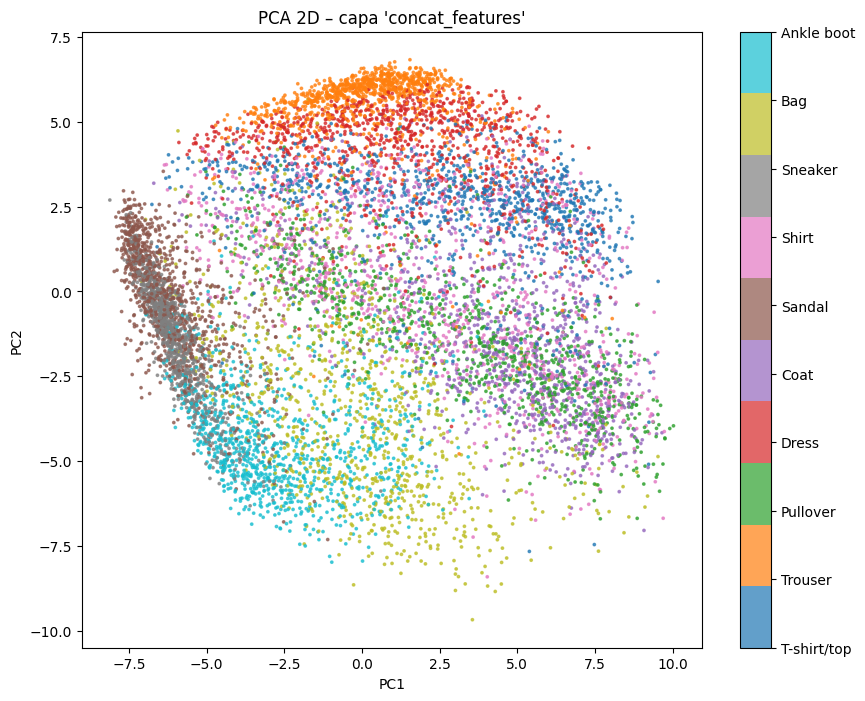

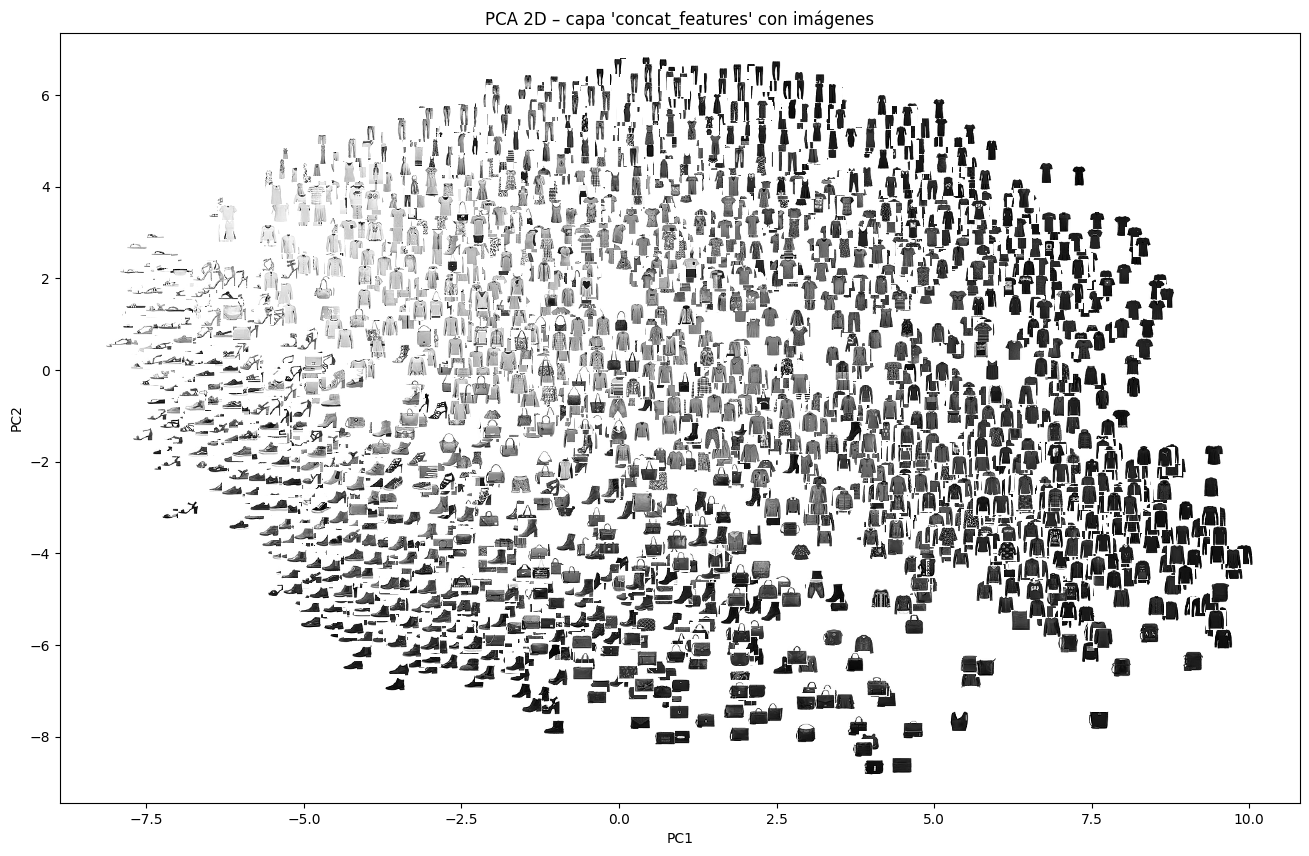

[2025-12-11 14:44:38.426] [CUML] [info] build_algo set to brute_force_knn because random_state is given
Dimensión UMAP 2D: (10000, 2)


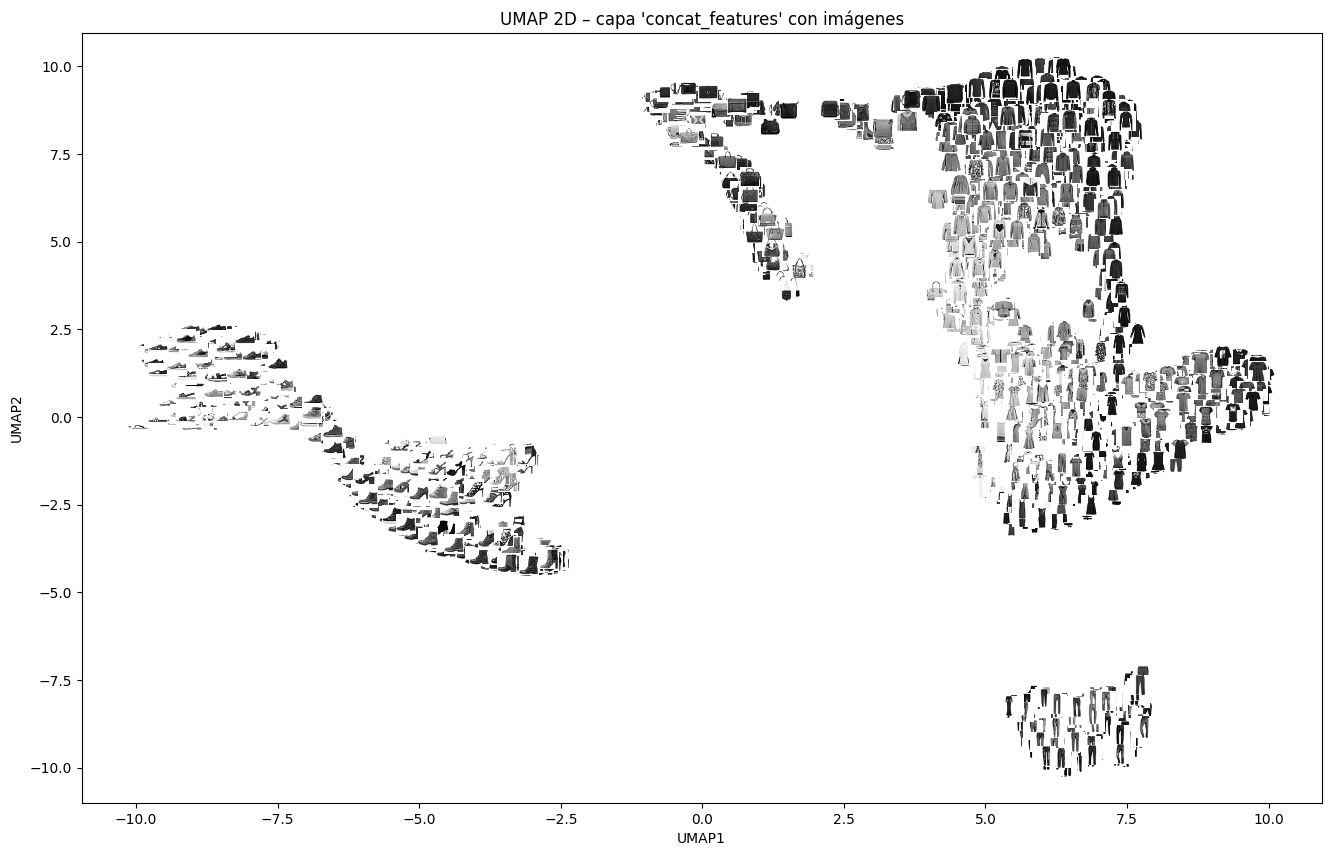

In [36]:
# =====================================================================
# 0. Importaciones y nombres de clases
# =====================================================================
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

try:
    import cuml
    from cuml import UMAP
    print("cuml importado correctamente")
except ImportError:
    print("ERROR: No se pudo importar cuml (RAPIDS). UMAP no GPU no funcionará.")

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# =====================================================================
# 1. Modelo funcional ejemplo con concatenación
# =====================================================================
tf.keras.backend.clear_session()

input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1], Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten()(input_l)

h1 = tf.keras.layers.Dense(200, activation='tanh', name='h1')(flatten)
h2 = tf.keras.layers.Dense(50, activation='tanh', name='h2')(h1)

# Capa de concatenación: h2 + flatten
concat = tf.keras.layers.concatenate([h2, flatten], name='concat_features')

# Dos salidas
output_A = tf.keras.layers.Dense(10, activation="softmax", name='outputA')(concat)
output_B = tf.keras.layers.Dense(10, activation="softmax", name='outputB')(h2)

model_fun = tf.keras.Model(inputs=input_l, outputs=[output_A, output_B])
model_fun.compile(loss="sparse_categorical_crossentropy",
                  optimizer="Adam",
                  metrics=["accuracy"])

# =====================================================================
# 2. Extraer características desde la capa de concatenación
# =====================================================================
extractor = tf.keras.Model(inputs=model_fun.inputs,
                           outputs=model_fun.get_layer("concat_features").output)

features = extractor.predict(Xtest)  # Xtest debe tener la misma forma que Xtrain
labels = ytest

print("Dimensión de atributos extraídos:", features.shape)

# =====================================================================
# 3. PCA a 2D
# =====================================================================
features_pca = PCA(n_components=2, random_state=42).fit_transform(features)

plt.figure(figsize=(10, 8))
plt.scatter(features_pca[:,0], features_pca[:,1], c=labels, cmap='tab10', s=3, alpha=0.7)
plt.title("PCA 2D – capa 'concat_features'")
plt.xlabel("PC1")
plt.ylabel("PC2")
cbar = plt.colorbar()
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(class_names)
plt.show()

# =====================================================================
# 4. Función para graficar MNIST en 2D
# =====================================================================
def plot_mnist_2d(Z, y, images, img_w=28, img_h=28, zoom=0.5, cmap='binary'):
    fig, ax = plt.subplots(figsize=(16, 10))
    for i in range(Z.shape[0]):
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom, cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

# Graficar un subconjunto
Ni = 4000
ind = np.random.randint(0, ytest.shape[0], Ni)
plot_mnist_2d(features_pca[ind], ytest[ind], Xtest[ind], img_w=28, img_h=28, zoom=0.5, cmap='binary')
plt.title("PCA 2D – capa 'concat_features' con imágenes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# =====================================================================
# 5. UMAP con cuML
# =====================================================================
features32 = features.astype("float32")

umap_model = UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    random_state=42
)

features_umap = umap_model.fit_transform(features32)
print("Dimensión UMAP 2D:", features_umap.shape)

# Normalizar para visualización
umap_min = features_umap.min(axis=0)
umap_max = features_umap.max(axis=0)
features_umap_scaled = 20 * (features_umap - umap_min) / (umap_max - umap_min) - 10

# Graficar UMAP
plot_mnist_2d(features_umap_scaled[ind], ytest[ind], Xtest[ind], img_w=28, img_h=28, zoom=0.5, cmap='binary')
plt.title("UMAP 2D – capa 'concat_features' con imágenes")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()


Shapes: Train=(5000, 28, 28, 1), Valid=(55000, 28, 28, 1), Test=(10000, 28, 28, 1)


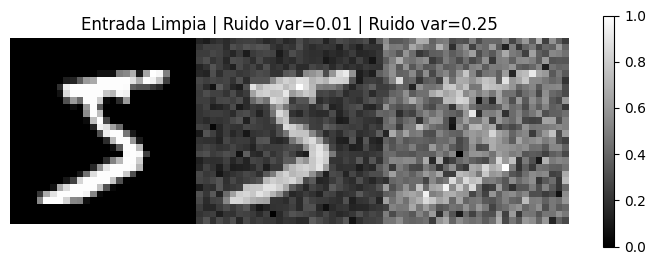

Model: "cnn_3entradas_2salidas"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_limpia        │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_ruido_1       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_ruido_2       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cnn_body            │ (None, 3136)      │     18,816 │ input_limpia[0][… │
│ (Functional)        │                   │            │ input_ruido_1[0]… │
│                     │                   │            │ input_ruido_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 9408)      │          0 │ cnn_body[0][0],   │
│ (Concatenate)       │                   │            │ cnn_body[1][0],   │
│                     │                   │            │ cnn_body[2][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │  1,204,352 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_digit        │ (None, 10)        │      1,290 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_par_impar    │ (None, 1)         │        129 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,224,587 (4.67 MB)

 Trainable params: 1,224,587 (4.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - loss: 1.4195 - output_digit_accuracy: 0.4508 - output_digit_loss: 1.6257 - output_par_impar_accuracy: 0.6537 - output_par_impar_loss: 0.5944 - val_loss: 0.2987 - val_output_digit_accuracy: 0.9127 - val_output_digit_loss: 0.3003 - val_output_par_impar_accuracy: 0.8861 - val_output_par_impar_loss: 0.2915
Epoch 2/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.3036 - output_digit_accuracy: 0.9018 - output_digit_loss: 0.3113 - output_par_impar_accuracy: 0.8848 - output_par_impar_loss: 0.2723 - val_loss: 0.1659 - val_output_digit_accuracy: 0.9496 - val_output_digit_loss: 0.1722 - val_output_par_impar_accuracy: 0.9490 - val_output_par_impar_loss: 0.1405
Epoch 3/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1815 - output_digit_accuracy: 0.9436 - output_digit_loss: 0.1884 - output_par_impar_accuracy: 0.9396 - output_par_impar_loss: 0.1536 - val_loss: 0.1317 - val_output_digit_accuracy: 0.9570 - val_output_digit_loss: 0.1375 - v

In [38]:
# =====================================================================
# 0. Importaciones y carga de datos MNIST
# =====================================================================
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Cargar MNIST
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Partición Train/Valid
X_train, X_valid = X_train_full[:-55000], X_train_full[-55000:]
y_train, y_valid = y_train_full[:-55000], y_train_full[-55000:]

# Normalizar y añadir canal
X_train = X_train[..., np.newaxis]/255.
X_valid = X_valid[..., np.newaxis]/255.
X_test = X_test[..., np.newaxis]/255.

print(f"Shapes: Train={X_train.shape}, Valid={X_valid.shape}, Test={X_test.shape}")

# =====================================================================
# 1. Generar entradas con ruido blanco gaussiano
# =====================================================================
var_ = [0.01, 0.25]
inputs_train = [X_train]
inputs_valid = [X_valid]
inputs_test = [X_test]

for var_i in var_:
    for dataset, input_list in zip([X_train, X_valid, X_test], [inputs_train, inputs_valid, inputs_test]):
        dim = dataset.shape
        tmp = dataset + np.sqrt(var_i)*np.random.randn(*dim)
        tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0], -1).T).T
        input_list.append(tmp.reshape(dim))

# Visualizar ejemplo
plt.figure(figsize=(9, 3))
plt.imshow(np.c_[inputs_train[0][0,:,:,0], inputs_train[1][0,:,:,0], inputs_train[2][0,:,:,0]], cmap='gray')
plt.title("Entrada Limpia | Ruido var=0.01 | Ruido var=0.25")
plt.axis('off')
plt.colorbar()
plt.show()

# =====================================================================
# 2. Definir arquitectura CNN funcional con 3 entradas
# =====================================================================
tf.keras.backend.clear_session()

# Entradas
input_clean = tf.keras.layers.Input(shape=[28,28,1], name="input_limpia")
input_noisy1 = tf.keras.layers.Input(shape=[28,28,1], name="input_ruido_1")
input_noisy2 = tf.keras.layers.Input(shape=[28,28,1], name="input_ruido_2")

# Cuerpo CNN compartido
def create_cnn_body():
    cnn_input = tf.keras.layers.Input(shape=[28,28,1])
    x = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(cnn_input)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)
    x = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)
    x = tf.keras.layers.Flatten()(x)
    return tf.keras.Model(inputs=cnn_input, outputs=x, name="cnn_body")

cnn_body = create_cnn_body()

# Aplicar cuerpo CNN a las 3 entradas (pesos compartidos)
features_clean = cnn_body(input_clean)
features_noisy1 = cnn_body(input_noisy1)
features_noisy2 = cnn_body(input_noisy2)

# Concatenar características
concat_features = tf.keras.layers.concatenate([features_clean, features_noisy1, features_noisy2])
x = tf.keras.layers.Dense(128, activation='relu')(concat_features)
x = tf.keras.layers.Dropout(0.3)(x)

# Salidas
output_digit = tf.keras.layers.Dense(10, activation='softmax', name='output_digit')(x)
output_even_odd = tf.keras.layers.Dense(1, activation='sigmoid', name='output_par_impar')(x)

# Crear modelo final
model_cnn = tf.keras.Model(
    inputs=[input_clean, input_noisy1, input_noisy2],
    outputs=[output_digit, output_even_odd],
    name="cnn_3entradas_2salidas"
)

# Resumen
model_cnn.summary()
tf.keras.utils.plot_model(model_cnn, show_shapes=True)

# =====================================================================
# 3. Preparar etiquetas
# =====================================================================
y_train_d, y_valid_d, y_test_d = y_train, y_valid, y_test
y_train_p = (y_train % 2).astype(int)
y_valid_p = (y_valid % 2).astype(int)
y_test_p = (y_test % 2).astype(int)

# =====================================================================
# 4. Compilar modelo
# =====================================================================
model_cnn.compile(
    loss={"output_digit": "sparse_categorical_crossentropy", "output_par_impar": "binary_crossentropy"},
    loss_weights={"output_digit": 0.8, "output_par_impar": 0.2},
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics={"output_digit": "accuracy", "output_par_impar": "accuracy"}
)

# =====================================================================
# 5. Entrenar modelo
# =====================================================================
history_cnn = model_cnn.fit(
    inputs_train, [y_train_d, y_train_p],
    epochs=15,
    batch_size=64,
    validation_data=(inputs_valid, [y_valid_d, y_valid_p]),
    verbose=1
)

# =====================================================================
# 6. Evaluar modelo
# =====================================================================
results = model_cnn.evaluate(inputs_test, [y_test_d, y_test_p], batch_size=64)
for name, value in zip(model_cnn.metrics_names, results):
    print(f"{name}: {value:.4f}")
